<p align="center">
<img src="https://github.com/adelnehme/data-upskilling-learning-club/blob/master/assets/datacamp_amazon.png?raw=true" alt = "DataCamp Amazon icon" width="65%">
</p>


## **Data UpSkilling Learning Club: Introduction to Python**


### **Key session takeaways**

* Import data into Python using `pandas` — Python’s most popular data analysis package.
* Filter, add new columns, and analyse datasets using pandas.
* Present data visualisations using `matplotlib` and `seaborn` — Python's most popular data visualization packages.

### **The Dataset**

The dataset to be used in this webinar is a CSV file named `airbnb.csv`, which contains data on airbnb listings in the state of New York. It contains the following columns:

- `listing_id`: The unique identifier for a listing
- `description`: The description used on the listing
- `host_id`: Unique identifier for a host
- `neighbourhood_full`: Name of boroughs and neighbourhoods
- `coordinates`: Coordinates of listing _(latitude, longitude)_
- `listing_added`: Date of added listing
- `room_type`: Type of room 
- `rating`: Rating from 0 to 5.
- `price`: Price per night for listing
- `number_of_reviews`: Amount of reviews received 
- `reviews_per_month`: Number of reviews per month
- `availability_365`: Number of days available per year
- `number_of_stays`: Total number of stays thus far


## **Getting started**

<font color=00AAFF>*Just like we click and open pre-installed software on any computer OS before running analysis — we import pre-installed packages into Python before using them*<font color=00AAFF>

```
import package_name as package_alias
```

In [174]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<font color=00AAFF>*To import a CSV file into* `pandas` *, we use* <font color=00AAFF>

```
data = pd.read_csv(file_path)
```

<font color=00AAFF>*Check out this [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) for importing other data types.*<font color=00AAFF>


In [175]:
# Read in the dataset
airbnb = pd.read_csv('https://raw.githubusercontent.com/adelnehme/data-upskilling-learning-club/master/data/airbnb.csv', index_col = 0)

<font color=00AAFF>*Some important and common methods needed to get a better understanding of DataFrames and diagnose potential data problems are the following:*<font color=00AAFF>

```
# Show the first 5 rows of the data
airbnb.head()

# Show information on columns and data types
airbnb.info()

# Show distribution of numeric columns
airbnb.describe()
```

In [176]:
# Inspect header of dataset
airbnb.head()

,listing_id,description,host_id,neighbourhood_full,coordinates,room_type,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125.0,"Brooklyn, Flatlands","(40.63222, -73.93398)",private room,45$,10,0.70,85,4.100954,12.0,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113.0,"Manhattan, Upper West Side","(40.78761, -73.96862)",entire home/apt,135$,1,1.00,145,3.367600,1.2,2018-12-25
2,6425850,"Spacious, charming studio",32715865.0,"Manhattan, Upper West Side","(40.79169, -73.97498)",entire home/apt,86$,5,0.13,0,4.763203,6.0,2017-03-20
3,22986519,Bedroom on the lively Lower East Side,154262349.0,"Manhattan, Lower East Side","(40.71884, -73.98354)",private room,160$,23,2.29,102,3.822591,27.6,2020-10-23
4,271954,Beautiful brownstone apartment,1423798.0,"Manhattan, Greenwich Village","(40.73388, -73.99452)",entire home/apt,150$,203,2.22,300,4.478396,243.6,2018-12-15


* _**Problem 1:** Taking a look at the_ `price` _column, it seems it's not a numeric data type_
* _**Problem 2:** We need to extract the Borough from the_ `neighbourhood_full` _column_

In [177]:
# Check description of dataset
airbnb.describe()

,listing_id,host_id,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays
count,7.734000e+03,7.727000e+03,7734.000000,7734.000000,7734.000000,7734.000000,7734.000000
mean,1.838769e+07,6.481466e+07,28.355185,1.353746,114.546160,4.012199,34.026222
std,1.069230e+07,7.610154e+07,46.962275,1.613229,129.862583,0.574812,56.354729
min,3.831000e+03,2.787000e+03,1.000000,0.010000,0.000000,3.000633,1.200000
25%,9.028764e+06,7.155462e+06,3.000000,0.200000,0.000000,3.518918,3.600000
50%,1.930978e+07,2.951896e+07,9.000000,0.710000,54.000000,4.024223,10.800000
75%,2.790623e+07,1.017516e+08,32.000000,2.000000,230.000000,4.514173,38.400000
max,3.635113e+07,2.733615e+08,510.000000,16.220000,365.000000,4.999561,612.000000


In [178]:
# Check information of dataset
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7734 entries, 0 to 7733
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   listing_id          7734 non-null   int64  
 1   description         7733 non-null   object 
 2   host_id             7727 non-null   float64
 3   neighbourhood_full  7734 non-null   object 
 4   coordinates         7734 non-null   object 
 5   room_type           7734 non-null   object 
 6   price               7734 non-null   object 
 7   number_of_reviews   7734 non-null   int64  
 8   reviews_per_month   7734 non-null   float64
 9   availability_365    7734 non-null   int64  
 10  rating              7734 non-null   float64
 11  number_of_stays     7734 non-null   float64
 12  listing_added       7734 non-null   object 
dtypes: float64(4), int64(3), object(6)
memory usage: 845.9+ KB


* _**Problem 3:** From the output, it seems that we have missing data in_ `host_id`, `description` columns.
* _**Problem 4:** We need to convert_ `listing_added` _column to date column._

## **Data Cleaning**

### **Data cleaning to-do list!**

_Data Type Problems_

- _**Task 1**: Remove_ `$` _from_ `price` _and convert it to_ `float`
- _**Task 2**: Convert_ `listing_added` _to_ `datetime`

<br>

_Text/categorical data problems:_

- _**Task 3**: Extract borough from_ `neighbourhood_full`

<br>

_Dealing with missing data:_

- _**Task 4**: Deal with missing data in_ `host_id` _and_ `description` _columns_

<br>


##### **Task 1:** Remove `$` from `price` and convert it to `float`


<font color="00AAFF"> _To remove a character from a string column, we can use:_ </font>

```
data['column_name'] = data['column_name'].str.strip(character)
```

<font color="00AAFF"> _To convert a numeric column to a float, we can use:_ </font>

```
data['column_name'] = data['column_name'].astype('float')
```

In [179]:
# Strip $ from price column
airbnb['price'] = airbnb['price'].str.strip('$')

# Convert price column to float
airbnb['price'] = airbnb['price'].astype('float')

# Print header again
airbnb.head()

,listing_id,description,host_id,neighbourhood_full,coordinates,room_type,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125.0,"Brooklyn, Flatlands","(40.63222, -73.93398)",private room,45.0,10,0.70,85,4.100954,12.0,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113.0,"Manhattan, Upper West Side","(40.78761, -73.96862)",entire home/apt,135.0,1,1.00,145,3.367600,1.2,2018-12-25
2,6425850,"Spacious, charming studio",32715865.0,"Manhattan, Upper West Side","(40.79169, -73.97498)",entire home/apt,86.0,5,0.13,0,4.763203,6.0,2017-03-20
3,22986519,Bedroom on the lively Lower East Side,154262349.0,"Manhattan, Lower East Side","(40.71884, -73.98354)",private room,160.0,23,2.29,102,3.822591,27.6,2020-10-23
4,271954,Beautiful brownstone apartment,1423798.0,"Manhattan, Greenwich Village","(40.73388, -73.99452)",entire home/apt,150.0,203,2.22,300,4.478396,243.6,2018-12-15


##### **Task 2:** Convert `listing_added` to `datetime`

<font color="00AAFF"> _To convert a date column to_ </font> `datetime`<font color="00AAFF">_, we can use:_


```
data['column_name'] = pd.to_datetime(data['column_name'])
```

In [ ]:
# Convert listing_added to datetime
airbnb['listing_added'] = pd.to_datetime(airbnb['listing_added'])

# Print info again
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7734 entries, 0 to 7733
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   listing_id          7734 non-null   int64         
 1   description         7733 non-null   object        
 2   host_id             7727 non-null   float64       
 3   neighbourhood_full  7734 non-null   object        
 4   coordinates         7734 non-null   object        
 5   room_type           7734 non-null   object        
 6   price               7734 non-null   float64       
 7   number_of_reviews   7734 non-null   int64         
 8   reviews_per_month   7734 non-null   float64       
 9   availability_365    7734 non-null   int64         
 10  rating              7734 non-null   float64       
 11  number_of_stays     7734 non-null   float64       
 12  listing_added       7734 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(3), obje

##### **Task 3:** Extract borough from `neighbourhood_full` column

<font color="00AAFF"> _To split a column into multiple columns, we can use:_</font>

```
split_data = data['column_name'].str.split(',', expand = True)
```


In [ ]:
# Create new DataFrame with split column
borough_neighbourhood = airbnb['neighbourhood_full'].str.split(',', expand = True)

borough_neighbourhood

In [ ]:
# Create borough and neighbourhood columns
airbnb['borough'] = borough_neighbourhood[0]
airbnb['neighbourhood'] = borough_neighbourhood[1]

# Print header of columns
airbnb[['neighbourhood_full', 'borough', 'neighbourhood']].head()

,neighbourhood_full,borough,neighbourhood
0,"Brooklyn, Flatlands",Brooklyn,Flatlands
1,"Manhattan, Upper West Side",Manhattan,Upper West Side
2,"Manhattan, Upper West Side",Manhattan,Upper West Side
3,"Manhattan, Lower East Side",Manhattan,Lower East Side
4,"Manhattan, Greenwich Village",Manhattan,Greenwich Village


In [ ]:
# Drop original neighbourhood_full column
airbnb.drop('neighbourhood_full', axis = 1 , inplace = True)

##### **Task 4:** Deal with missing values in `host_id` and `description` columns


<font color="00AAFF"> _To count and drop missing values in a DataFrame, you can use the following:_</font>

```
# Count missing values per column
data.isna().sum()

# Count missing values of one column
data['column_name'].isna().sum()

# Drop missing values
# data.dropna()
```

In [ ]:
# Find missing values
airbnb.isna().sum()

listing_id            0
description           1
host_id               7
neighbourhood_full    0
coordinates           0
room_type             0
price                 0
number_of_reviews     0
reviews_per_month     0
availability_365      0
rating                0
number_of_stays       0
listing_added         0
borough               0
neighbourhood         0
dtype: int64

In [ ]:
# Drop missing values
airbnb = airbnb.dropna()
# Count missing values again
airbnb.isna().sum()

listing_id            0
description           0
host_id               0
neighbourhood_full    0
coordinates           0
room_type             0
price                 0
number_of_reviews     0
reviews_per_month     0
availability_365      0
rating                0
number_of_stays       0
listing_added         0
borough               0
neighbourhood         0
listing_year          0
dtype: int64

## **Data Analysis and Visualization**

##### **Question 1:** What is the distribution of price per room type?

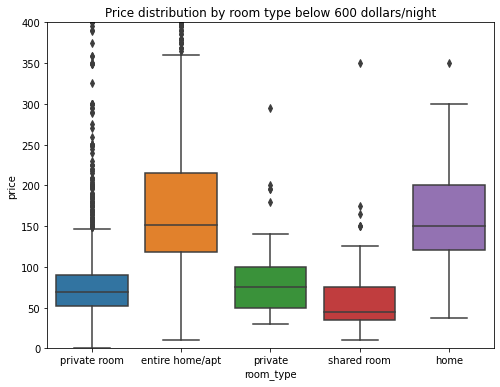

In [ ]:
# Visualize price by room type
plt.figure(figsize = (8,6))

# Create plot
sns.boxplot(x = 'room_type', y = 'price', data = airbnb)

# Set title of plot
plt.title('Price distribution by room type below 600 dollars/night')
# Set y-axis limit
plt.ylim(0,400)
# Show plot
plt.show()

##### **Question 2:** What are the number of listings per borough?

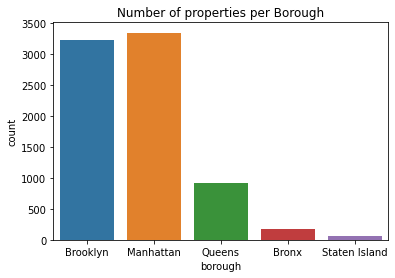

In [ ]:
# Count the amount of listings per borough
sns.countplot(x = 'borough', data = airbnb)

# Set title of plot
plt.title('Number of properties per Borough')
# Show plot
plt.show()

##### **Question 3:** What are the number of listings per year?

In [ ]:
# Extract listing year column from listing_added column
airbnb['listing_year'] = airbnb['listing_added'].dt.year

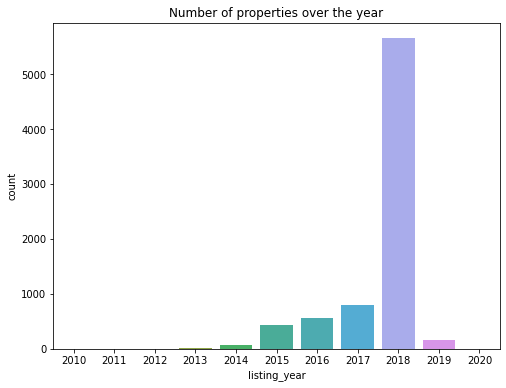

In [ ]:
# Set figure size
plt.figure(figsize = (8,6))

# Count the number of listings per year
sns.countplot(x = 'listing_year', data = airbnb)

# Set plot title
plt.title('Number of properties over the year')
# Show plot
plt.show()

##### **Question 4:** What are the number of listings per year in each borough?

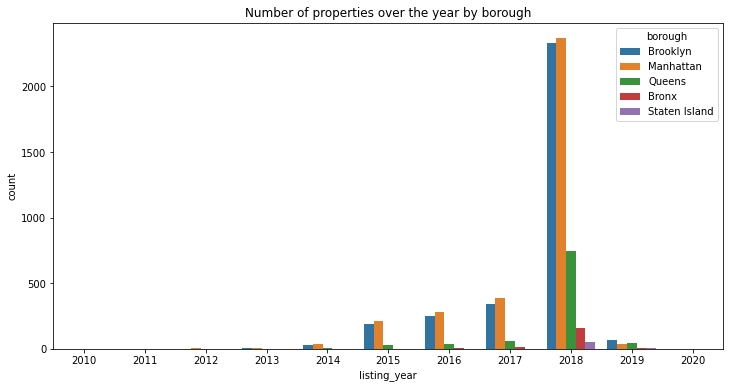

In [ ]:
# Set figure size
plt.figure(figsize = (12,6))

# Count the number of listings per year for each borough
sns.countplot(x = 'listing_year', data = airbnb, hue = 'borough')

# Set plot title
plt.title('Number of properties over the year by borough')

# Show title
plt.show()